In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns

from matplotlib.colors import TwoSlopeNorm

import os.path as op
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test

from mne_connectivity import spectral_connectivity_epochs, seed_target_indices
from mne.datasets import sample
from mne_connectivity.viz import plot_sensors_connectivity
from mne.stats import permutation_cluster_test
from scipy import stats as stats
from functools import partial

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
dict015= {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FT9':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg','FT10':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','TP9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','TP10':'eeg','P7':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL':'emg','EmgR':'emg','EmgL(lc)':'emg','EmgR(lc)':'emg'}

dict013_imp = {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','FT9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','FT10':'eeg','TP9':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL':'emg','EmgR':'emg','EmgL(lc)':'emg','EmgR(lc)':'emg'}

dict013_exp = dict015

dict011_imp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg','F4':'eeg','Fz':'eeg','F3':'eeg',
              'F7':'eeg','FC6':'eeg','FC2':'eeg','FC1':'eeg','FC5':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg','T7':'eeg','FT10':'eeg',
               'CP6':'eeg','CP2':'eeg','CP1':'eeg', 'CP5':'eeg', 'FT9':'eeg', 'TP10':'eeg','P4':'eeg','Pz':'eeg','P3':'eeg','P7':'eeg','O2':'eeg',
               'O1':'eeg', 'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
              'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
             'DynR(lc)':'misc', 'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict011_exp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg','F4':'eeg','Fz':'eeg','F3':'eeg',
              'F7':'eeg','FT10':'eeg', 'FC6':'eeg','FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
               'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg', 'CP5':'eeg', 'TP9':'eeg', 'P8':'eeg','P4':'eeg','Pz':'eeg',
               'P3':'eeg','P7':'eeg','O2':'eeg', 'O1':'eeg', 'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs',
               'DBS6-7':'dbs','DBS7-8':'dbs', 'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
             'DynR(lc)':'misc', 'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}
           
    
#'DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs','mean(DBS1-234, DBS234-567, DBS567-8)':'dbs',

dict08_imp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','O2':'eeg','O1':'eeg',
                  'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs', 
                  'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',              
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',             
              'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict08_exp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FC6':'eeg', 'FC2':'eeg','FC1':'eeg','FC5':'eeg',
              'T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg', 'T7':'eeg','FT10':'eeg', 'CP6':'eeg','CP2':'eeg',
              'CP1':'eeg','CP5':'eeg','FT9':'eeg','TP10':'eeg', 'P4':'eeg','Pz':'eeg','P3':'eeg','P7':'eeg',
              'O2':'eeg','O1':'eeg',
                  'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs', 
                  'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',              
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',         
              'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict07_imp= {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','O2':'eeg','O1':'eeg',
                  'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs', 
                  'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',              
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',
             'DynR':'misc','DynL':'misc','DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict07_exp= {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P8':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','P7':'eeg','O2':'eeg','O1':'eeg',
                  'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs', 
                  'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',              
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',         
             'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict_eog= {'FP1':'eog'}


dict015_go= {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FT9':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg','FT10':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','TP9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','TP10':'eeg','P7':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mea':'misc',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL':'emg','EmgR':'emg','EmgL(lc)':'emg','EmgR(lc)':'emg'}

dict014_exp_go= {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FT9':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg','FT10':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','TP9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','TP10':'eeg','P7':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mea':'misc',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL(lc)':'emg','EmgR(lc)':'emg'}



dict013_imp_go = {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','P7':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','FT9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','FT10':'eeg','TP9':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mea':'misc',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL':'emg','EmgR':'emg','EmgL(lc)':'emg','EmgR(lc)':'emg'}

dict013_exp_go = {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FT9':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg','FT10':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','TP9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','TP10':'eeg','P7':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mea':'misc',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL(lc)':'emg','EmgR(lc)':'emg'}



dict011_imp_go = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg','F4':'eeg','Fz':'eeg','F3':'eeg',
              'F7':'eeg','P8':'eeg','FC6':'eeg','FC2':'eeg','FC1':'eeg','FC5':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg','T7':'eeg','FT10':'eeg',
               'CP6':'eeg','CP2':'eeg','CP1':'eeg', 'CP5':'eeg', 'FT9':'eeg', 'TP10':'eeg','P4':'eeg','Pz':'eeg','P3':'eeg','O2':'eeg',
               'O1':'eeg', 'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
               'DynR(lc)':'misc', 'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict011_exp_go = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg','F4':'eeg','Fz':'eeg','F3':'eeg',
              'F7':'eeg','FT10':'eeg', 'FC6':'eeg','FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
               'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg', 'CP5':'eeg', 'TP9':'eeg', 'P8':'eeg','P4':'eeg','Pz':'eeg',
               'P3':'eeg','P7':'eeg','O2':'eeg', 'O1':'eeg', 'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs',
               'DBS6-7':'dbs','DBS7-8':'dbs',
             'DynR(lc)':'misc', 'DynL(lc)':'misc','EmgR(lc)':'emg','EmgL(lc)':'emg'}


#'DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs','mean(DBS1-234, DBS234-567, DBS567-8)':'dbs',

dict08_imp_go = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','O2':'eeg','O1':'eeg',
                  'DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs','mea':'dbs',            
              'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict08_exp_go = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','P8':'eeg','FC6':'eeg', 'FC2':'eeg','FC1':'eeg','FC5':'eeg',
              'T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg', 'T7':'eeg','FT10':'eeg', 'CP6':'eeg','CP2':'eeg',
              'CP1':'eeg','CP5':'eeg','FT9':'eeg','TP10':'eeg', 'P4':'eeg','Pz':'eeg','P3':'eeg',
              'O2':'eeg','O1':'eeg',
                  'DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs','mea':'dbs',         
              'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}


dict07_imp_go= {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','O2':'eeg','O1':'eeg',
                'DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs','mea':'dbs',
             'DynR':'misc','DynL':'misc','DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict07_exp_go= {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P8':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','P7':'eeg','O2':'eeg','O1':'eeg',
                  'DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs','mea':'dbs',                     
             'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}
           

In [3]:
base_dir = "E:/Oddball Data/"
subj_list = ['007','008','011','013','014','015']
subj_list = ['007']

stage = ['implant']#, 'implant']explant
aff_cond = ['1', '101'];
aff_cond_plot = ['Standard', 'Oddball'];

naff_cond = ['10', '110'];

hand = 'aff'

if hand == 'naff':
    aff_cond = naff_cond
    
    
for sub in subj_list:
    for st in stage:
        data_dir = base_dir+"EDEN"+sub+'/ANALYSIS/'
        fname = data_dir+"data_clean"+st+'.mat'
                
        data_dir_Goballistic = base_dir+ "Go_timelocked_go"
        fname_Goballistic = data_dir_Goballistic+"/Go_timelocked_go_"+ sub +'_'+st+'.mat'
        
        
        if hand == 'naff':
            fname = data_dir+"data_clean"+st+'_naff_cond.mat'
            dyno = 'DynR(lc)'
        else:
            fname = data_dir+"data_clean"+st+'.mat'
            dyno = 'DynL(lc)'   
            
            
                       
        if sub == '015':
            dict1 = dict015
            dict1_go = dict015_go
        
        elif sub == '014' and st== 'implant':
            dict1 = dict015
            dict1_go = dict015_go        
        elif sub == '014' and st== 'explant':
            dict1 = dict015
            dict1_go = dict014_exp_go
                    
        elif sub == '013' and st== 'implant':
            dict1 = dict013_imp
            dict1_go = dict013_imp_go
        elif sub == '013' and st== 'explant':
            dict1 = dict013_exp
            dict1_go = dict013_exp_go

        elif sub == '011' and st== 'implant':
            dict1 = dict011_imp
            dict1_go = dict011_imp_go
        elif sub == '011' and st== 'explant':
            dict1 = dict011_exp
            dict1_go = dict011_exp_go
        elif sub == '008' and st== 'implant':
            dict1 = dict08_imp
            dict1_go = dict08_imp_go

        elif sub == '008' and st== 'explant':
            dict1 = dict08_exp
            dict1_go = dict08_exp_go
        elif sub == '007' and st== 'implant':
            dict1 = dict07_imp
            dict1_go = dict07_imp_go
        elif sub == '007' and st== 'explant':
            dict1 = dict07_exp
            dict1_go = dict07_exp_go

        info = mne.create_info(list(dict1.keys()), sfreq=200, ch_types='misc', verbose=None)
        info_go = mne.create_info(list(dict1_go.keys()), sfreq=200, ch_types='misc', verbose=None)
        
        epochs_Goballistic = mne.read_epochs_fieldtrip(fname_Goballistic,info_go,data_name='data_eogclean', trialinfo_column=0)
        epochs = mne.read_epochs_fieldtrip(fname,info,data_name='x', trialinfo_column=0)
        
        sfreq = epochs.info['sfreq']
        
        epochs.set_channel_types(dict1)
        epochs_Goballistic.set_channel_types(dict1_go)        

        kind='easycap-M1'
        mon = mne.channels.make_standard_montage(kind, head_size='auto')
        epochs.set_montage(mon,match_case=False, on_missing='ignore')
        epochs_Goballistic.set_montage(mon,match_case=False, on_missing='ignore')

        epochs = epochs.filter(0.1,20, method='iir')
        epochs_Goballistic = epochs_Goballistic.filter(0.1,20, method='iir')

        epochs_aff_odd = epochs[aff_cond[1]]
        epochs_aff_typ = epochs[aff_cond[0]]
        epochs_Goballistic = epochs_Goballistic[aff_cond[0]]

        mne.epochs.equalize_epoch_counts([epochs_aff_typ,epochs_aff_odd], method='mintime')
        epochs_Goballistic = epochs_Goballistic[:len(epochs_aff_typ)]

        epochs_aff_odd.set_channel_types(dict_eog)
        epochs_aff_typ.set_channel_types(dict_eog)
        epochs_Goballistic.set_channel_types(dict_eog)
"""epochs_aff_odd = epochs_aff_odd.apply_baseline((-0.5,0))
epochs_aff_typ = epochs_aff_typ.apply_baseline((-0.5,0))
epochs_Goballistic1 = epochs_Goballistic.apply_baseline((-0.5,0))
"""


C:\Users\malann\AppData\Local\Temp\ipykernel_858228\3657039459.py:76: RuntimeWarning: The following channels are present in the FieldTrip data but cannot be found in the provided info: {'P8', 'P7'}.
These channels will be removed from the resulting data!
  epochs_Goballistic = mne.read_epochs_fieldtrip(fname_Goballistic,info_go,data_name='data_eogclean', trialinfo_column=0)


Adding metadata with 11 columns
193 matching events found
No baseline correction applied
Adding metadata with 9 columns
404 matching events found
No baseline correction applied
Setting up band-pass filter from 0.1 - 20 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.10, 20.00 Hz: -6.02, -6.02 dB



C:\Users\malann\AppData\Local\Temp\ipykernel_858228\3657039459.py:81: RuntimeWarning: The unit for channel(s) AF3, AF4, AF7, AF8, AFz, C3, C4, CP1, CP2, CP5, CP6, Cz, DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8, EmgL, EmgL(lc), EmgR, EmgR(lc), F3, F4, F7, F8, FC1, FC2, FC5, FC6, FP1, FP2, FT10, FT9, Fz, O1, O2, P3, P4, Pz, T7, T8, TP10, TP9 has changed from NA to V.
  epochs.set_channel_types(dict1)
C:\Users\malann\AppData\Local\Temp\ipykernel_858228\3657039459.py:82: RuntimeWarning: The unit for channel(s) AF3, AF4, AF7, AF8, AFz, C3, C4, CP1, CP2, CP5, CP6, Cz, DBS1-234, DBS234-567, DBS567-8, EmgL, EmgL(lc), EmgR, EmgR(lc), F3, F4, F7, F8, FC1, FC2, FC5, FC6, FP1, FP2, FT10, FT9, Fz, O1, O2, P3, P4, Pz, T7, T8, TP10, TP9, mea has changed from NA to V.
  epochs_Goballistic.set_channel_types(dict1_go)


Setting up band-pass filter from 0.1 - 20 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.10, 20.00 Hz: -6.02, -6.02 dB

Dropped 99 epochs: 0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 26, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 70, 72, 74, 77, 79, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 103, 104, 105, 106, 107, 108, 111, 115, 116, 117, 119, 121, 122, 125, 128, 129, 131, 132, 133, 134, 138, 139, 140, 141, 142, 143, 144, 145, 146
Dropped 0 epochs: 


'epochs_aff_odd = epochs_aff_odd.apply_baseline((-0.5,0))\nepochs_aff_typ = epochs_aff_typ.apply_baseline((-0.5,0))\nepochs_Goballistic1 = epochs_Goballistic.apply_baseline((-0.5,0))\n'

In [100]:

"""Average Baseline"""
epochs_aff_odd_norm1 =[] 
for ii,ch in enumerate(epochs_aff_odd.ch_names):
    x = np.hstack(epochs_aff_odd.get_data()[:, ii, :]) # 2D dim = epoch* ch* time to 1D dim, freq * (time *epoch)

    x_mean=x.mean() # mean of all the freqs across all the complete experiment session.
    epochs_aff_odd_norm=[]    
    for jj in range(epochs_aff_odd.get_data()[:, ii, :].shape[0]):
        epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
    epochs_aff_odd_norm1.append(epochs_aff_odd_norm)
epochs_aff_odd_norm1 = np.array(epochs_aff_odd_norm1)
epochs_aff_odd_norm1 = np.rollaxis(epochs_aff_odd_norm1,1) # normalized epoch data

epochs_aff_odd = mne.EpochsArray(epochs_aff_odd_norm1,  epochs_aff_odd.info, events=epochs_aff_odd.events, tmin=epochs_aff_odd.tmin)


"""Average Baseline"""
epochs_aff_typ_norm1 =[] 
for ii,ch in enumerate(epochs_aff_typ.ch_names):
    x = np.hstack(epochs_aff_typ.get_data()[:, ii, :]) # 2D dim = epoch* ch* time to 1D dim, freq * (time *epoch)

    x_mean=x.mean() # mean of all the freqs across all the complete experiment session.
    epochs_aff_typ_norm=[]    
    for jj in range(epochs_aff_typ.get_data()[:, ii, :].shape[0]):
        epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
    epochs_aff_typ_norm1.append(epochs_aff_typ_norm)
epochs_aff_typ_norm1 = np.array(epochs_aff_typ_norm1)
epochs_aff_typ_norm1 = np.rollaxis(epochs_aff_typ_norm1,1) # normalized epoch data

epochs_aff_typ = mne.EpochsArray(epochs_aff_typ_norm1,  epochs_aff_typ.info, events=epochs_aff_typ.events, tmin=epochs_aff_typ.tmin)



"""Average Baseline"""
epochs_Goballistic_norm1 =[] 
for ii,ch in enumerate(epochs_Goballistic.ch_names):
    x = np.hstack(epochs_Goballistic.get_data()[:, ii, :]) # 2D dim = epoch* ch* time to 1D dim, freq * (time *epoch)

    x_mean=x.mean() # mean of all the freqs across all the complete experiment session.
    epochs_Goballistic_norm=[]    
    for jj in range(epochs_Goballistic.get_data()[:, ii, :].shape[0]):
        epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
    epochs_Goballistic_norm1.append(epochs_Goballistic_norm)
epochs_Goballistic_norm1 = np.array(epochs_Goballistic_norm1)
epochs_Goballistic_norm1 = np.rollaxis(epochs_Goballistic_norm1,1) # normalized epoch data

epochs_Goballistic = mne.EpochsArray(epochs_Goballistic_norm1,  epochs_Goballistic.info, events=epochs_Goballistic.events, tmin=epochs_Goballistic.tmin)


C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:4: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  x = np.hstack(epochs_aff_odd.get_data()[:, ii, :]) # 2D dim = epoch* ch* time to 1D dim, freq * (time *epoch)
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:8: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  for jj in range(epochs_aff_odd.get_data()[:, ii, :].shape[0]):
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Loca

Not setting metadata
64 matching events found
No baseline correction applied
0 projection items activated


C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  x = np.hstack(epochs_aff_typ.get_data()[:, ii, :]) # 2D dim = epoch* ch* time to 1D dim, freq * (time *epoch)
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:24: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  for jj in range(epochs_aff_typ.get_data()[:, ii, :].shape[0]):
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning:

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\L

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\L

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\L

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\L

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\L

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\L

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\L

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\L

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\L

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\L

Not setting metadata


C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\L

64 matching events found
No baseline correction applied
0 projection items activated


C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:37: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  x = np.hstack(epochs_Goballistic.get_data()[:, ii, :]) # 2D dim = epoch* ch* time to 1D dim, freq * (time *epoch)
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:41: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  for jj in range(epochs_Goballistic.get_data()[:, ii, :].shape[0]):
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:37: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  x = np.hstack(epochs_Goballistic.get_data()[:, ii, :]) # 2D dim = epoch* ch* time to 1D dim, freq * (time *epoch)
C:\Users\ma

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\3298402286.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_Goballistic_norm.append(((epochs_Goballistic.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
C

Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated


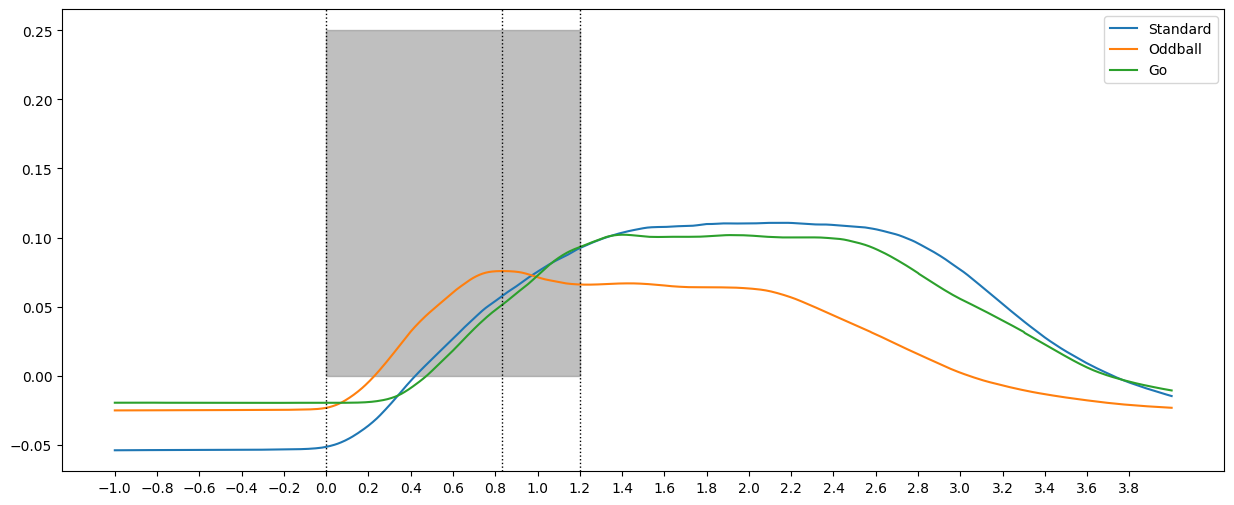

In [101]:
if subj_list[0] =='015':
    tshift =-0.9
else:
    tshift = -0.6
    
    
epochs_Goballistic = epochs_Goballistic.copy().shift_time(tshift, relative=True).crop(-3,6)

tmax = 4
Dynmo_odd = epochs_aff_odd.copy().crop(-1,tmax).get_data(picks='DynL(lc)')
Dynmo_odd= Dynmo_odd.reshape(Dynmo_odd.shape[0],Dynmo_odd.shape[2]).mean(axis=0)

Dynmo_typ = epochs_aff_typ.copy().crop(-1,tmax).get_data(picks='DynL(lc)')
Dynmo_typ= Dynmo_typ.reshape(Dynmo_typ.shape[0],Dynmo_typ.shape[2]).mean(axis=0)

Dynmo_go = epochs_Goballistic.copy().crop(-1,tmax).get_data(picks='DynL(lc)')
Dynmo_go= Dynmo_go.reshape(Dynmo_go.shape[0],Dynmo_go.shape[2]).mean(axis=0)

plt.figure(figsize=(15,6))

time= epochs_aff_typ.copy().crop(-1,tmax).times
time_go= epochs_Goballistic.copy().crop(-1,tmax).times


plt.plot(epochs_aff_typ.copy().crop(-1,tmax).times,Dynmo_typ)
plt.plot(epochs_aff_odd.copy().crop(-1,tmax).times,Dynmo_odd)
plt.plot(epochs_Goballistic.copy().crop(-1,tmax).times,Dynmo_go)

x=np.arange(-1,tmax,0.2)

plt.xticks(x)
f_max_time = np.argmax(epochs_aff_odd.copy().crop(0,1).get_data(picks='DynL(lc)').reshape(epochs_aff_odd.copy().crop(0,1).get_data(picks='DynL(lc)').shape[0],epochs_aff_odd.copy().crop(0,1).get_data(picks='DynL(lc)').shape[2]).mean(axis=0))/200

plt.axvline(0, linewidth=1, color="black", linestyle=":")

plt.axvline(f_max_time, linewidth=1, color="black", linestyle=":")
plt.axvline(1.2, linewidth=1, color="black", linestyle=":")
plt.fill_betweenx(np.array((0,0.25)), 1.2,0,color='gray', alpha=0.5)

plt.legend(['Standard','Oddball','Go'])

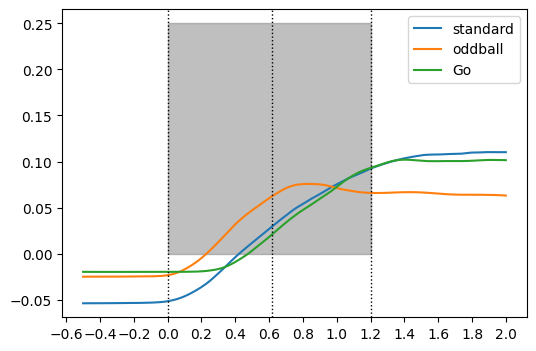

In [102]:
crop_min,crop_max = -0.5,2


tmax = 4
Dynmo_odd = epochs_aff_odd.copy().crop(crop_min,crop_max).get_data(picks='DynL(lc)')
Dynmo_odd= Dynmo_odd.reshape(Dynmo_odd.shape[0],Dynmo_odd.shape[2]).mean(axis=0)

Dynmo_typ = epochs_aff_typ.copy().crop(crop_min,crop_max).get_data(picks='DynL(lc)')
Dynmo_typ= Dynmo_typ.reshape(Dynmo_typ.shape[0],Dynmo_typ.shape[2]).mean(axis=0)

Dynmo_go = epochs_Goballistic.copy().crop(crop_min,crop_max).get_data(picks='DynL(lc)')
Dynmo_go= Dynmo_go.reshape(Dynmo_go.shape[0],Dynmo_go.shape[2]).mean(axis=0)


plt.figure(figsize=(6,4))

time= epochs_aff_typ.copy().crop(crop_min,crop_max).times

plt.plot(epochs_aff_typ.copy().crop(crop_min,crop_max).times,Dynmo_typ)
plt.plot(epochs_aff_odd.copy().crop(crop_min,crop_max).times,Dynmo_odd)
plt.plot(epochs_Goballistic.copy().crop(crop_min,crop_max).times,Dynmo_go)

x=np.arange(-1,tmax,0.2)

plt.xticks(x)
idx = np.argwhere(np.diff(np.sign(Dynmo_typ - Dynmo_odd))).flatten()

plt.axvline(0, linewidth=1, color="black", linestyle=":")

plt.axvline(0.62, linewidth=1, color="black", linestyle=":")
plt.axvline(1.2, linewidth=1, color="black", linestyle=":")
plt.fill_betweenx(np.array((0,0.25)), 1.2,0,color='gray', alpha=0.5)

plt.legend(['standard','oddball','Go'])

# Event-Related Potentials


C:\Users\malann\AppData\Local\Temp\ipykernel_997856\227483389.py:14: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_odd.plot(spatial_colors=True, gfp=True, highlight=time_ranges_of_interest, ylim =dict(eeg=[vmin,vmax],dbs=[vmin1,vmax1]))


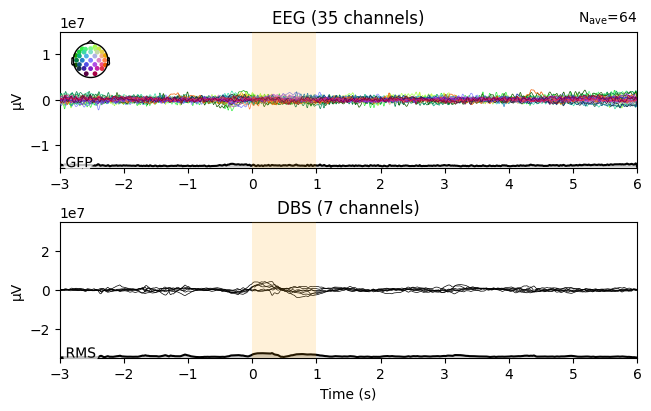

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\227483389.py:15: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_typ.plot(spatial_colors=True, gfp=True, highlight=time_ranges_of_interest, ylim= dict(eeg=[vmin,vmax],dbs=[vmin1,vmax1]))


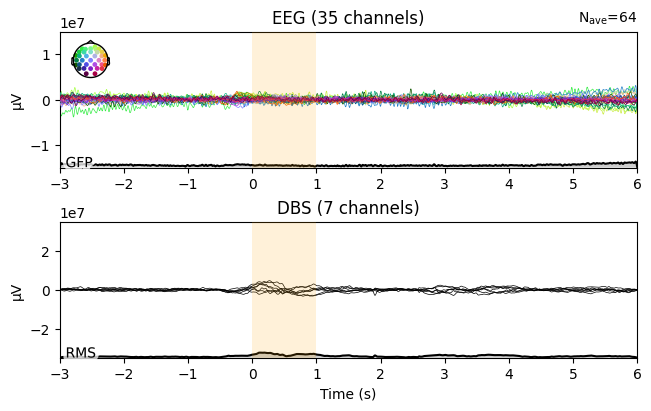

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\227483389.py:16: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_Goballistic.plot(spatial_colors=True, gfp=True, highlight=time_ranges_of_interest, ylim= dict(eeg=[vmin,vmax],dbs=[vmin1,vmax1]))


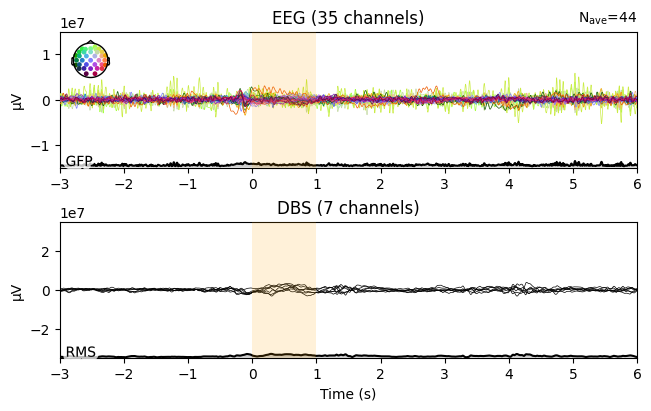

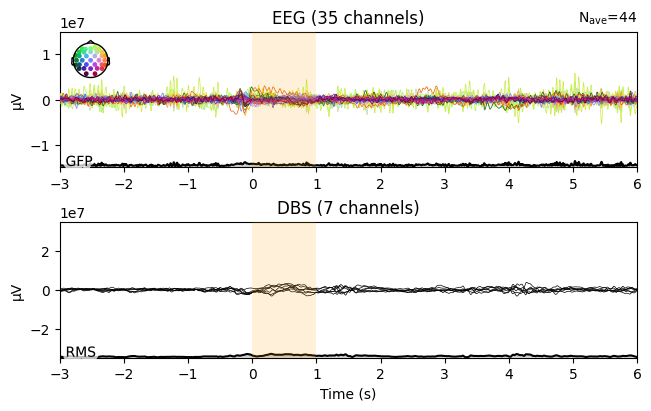

In [103]:
vmin,vmax= -15e6, 15e6
vmin1,vmax1= -35e6, 35e6
time_ranges_of_interest = [(0.0, 1)]

evoked_odd = epochs_aff_odd.average()
evoked_typ = epochs_aff_typ.average()
evoked_Goballistic = epochs_Goballistic.average()

#evoked_odd = evoked_odd.apply_baseline((-0.5,0))
#evoked_typ = evoked_typ.apply_baseline((-0.5,0))

#evoked_odd.apply_baseline((-2,-1))
#evoked_typ.apply_baseline((-2,-1))
evoked_odd.plot(spatial_colors=True, gfp=True, highlight=time_ranges_of_interest, ylim =dict(eeg=[vmin,vmax],dbs=[vmin1,vmax1]))
evoked_typ.plot(spatial_colors=True, gfp=True, highlight=time_ranges_of_interest, ylim= dict(eeg=[vmin,vmax],dbs=[vmin1,vmax1]))
evoked_Goballistic.plot(spatial_colors=True, gfp=True, highlight=time_ranges_of_interest, ylim= dict(eeg=[vmin,vmax],dbs=[vmin1,vmax1]))

In [ ]:
evoked_odd.copy().pick('eeg').plot_joint()
evoked_typ.copy().pick('eeg').plot_joint()
evoked_Goballistic.copy().pick('eeg').plot_joint()


In [ ]:
if subj_list == ['013'] or subj_list == ['014'] or subj_list == ['015']:
    ch_picks =['F4','F8','Fz','FC2','FC6','Cz','C4','CP2','CP6','P4']
else:
    ch_picks =['F8','F4','FC6','FC2','Fz','Cz','C4','CP6','CP2','P4']
    
evoked_odd.copy().crop(crop_min,crop_max).pick(ch_picks).plot_joint()
evoked_typ.copy().crop(crop_min,crop_max).pick(ch_picks).plot_joint()
evoked_Goballistic.copy().crop(crop_min,crop_max).pick(ch_picks).plot_joint()


In [ ]:
evoked_odd.copy().crop(crop_min,crop_max).pick(['Fz','Cz']).plot_joint()
evoked_typ.copy().crop(crop_min,crop_max).pick(['Fz','Cz']).plot_joint()
evoked_Goballistic.copy().crop(crop_min,crop_max).pick(['Fz','Cz']).plot_joint()

In [ ]:
ch_picks =['Fz','Cz','Pz']

   
for ch in ch_picks:
    title = ch
    mne.viz.plot_compare_evokeds(
        dict(standard=evoked_typ.copy().crop(crop_min,crop_max).pick([ch]),oddball=evoked_odd.copy().crop(crop_min,crop_max).pick([ch]),
            go=evoked_Goballistic.copy().crop(crop_min,crop_max).pick([ch])),
        legend="upper left",
        show_sensors="upper right",title=title
    )

In [ ]:
if subj_list == ['013'] or subj_list == ['014'] or subj_list == ['015']:
    ch_picks =['F4','F8','Fz','FC2','FC6','Cz','C4','CP2','CP6','P4','Pz']
else:
    ch_picks =['F8','F4','FC6','FC2','Fz','Cz','C4','CP6','CP2','P4','Pz']
    
    
for ch in ch_picks:
    title = ch
    mne.viz.plot_compare_evokeds(
        dict(standard=evoked_typ.copy().crop(crop_min,crop_max).pick([ch]),oddball=evoked_odd.copy().crop(crop_min,crop_max).pick([ch]),
            go=evoked_Goballistic.copy().crop(crop_min,crop_max).pick([ch])),
        legend="upper left",
        show_sensors="upper right",title=title
    )

In [ ]:
ch_picks = evoked_typ.copy().pick('dbs').ch_names
    
    
for ch in ch_picks:
    title = ch
    mne.viz.plot_compare_evokeds(
        dict(standard=evoked_typ.copy().crop(crop_min,crop_max).pick([ch]),oddball=evoked_odd.copy().crop(crop_min,crop_max).pick([ch])),
        legend="upper left",
        show_sensors="upper right",title=title
    )

# Statistical test

C:\Users\malann\AppData\Local\Temp\ipykernel_997856\893834320.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_odd_Cz = epochs_aff_odd.copy().crop(crop_min,crop_max).pick([chl]).get_data()[:, 0, :]  # only 1 channel as 3D matrix
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\893834320.py:4: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_typ_Cz = epochs_aff_typ.copy().crop(crop_min,crop_max).pick([chl]).get_data()[:, 0, :]  # only 1 channel as 3D matrix


stat_fun(H1): min=0.000048 max=7.960764
Running initial clustering …
Found 3 clusters


C:\Users\malann\AppData\Local\Temp\ipykernel_997856\893834320.py:5: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_go_Cz = epochs_Goballistic.copy().crop(crop_min,crop_max).pick([chl]).get_data()[:, 0, :]  # only 1 channel as 3D matrix


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]

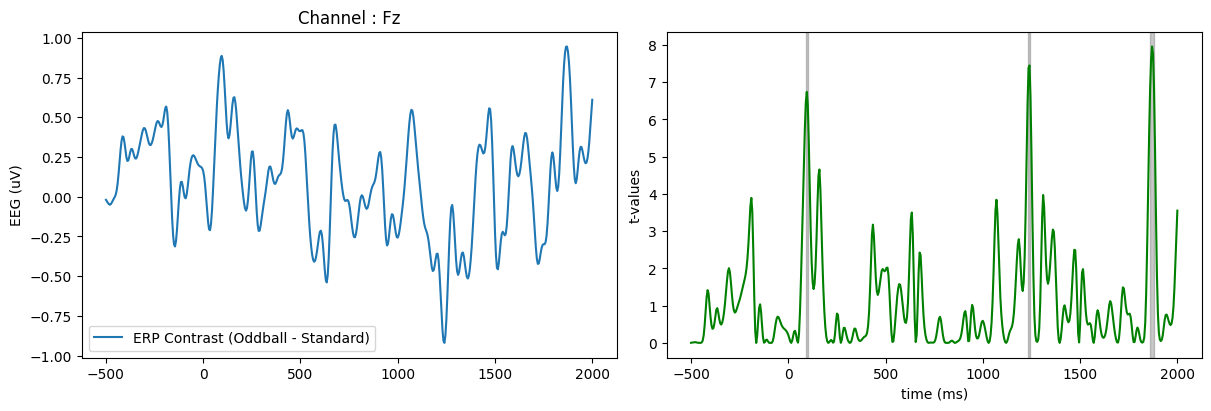

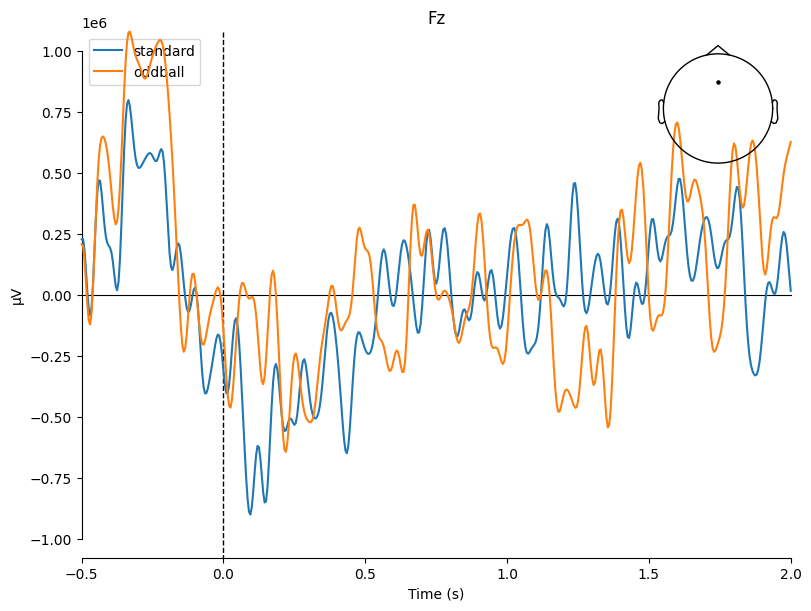

stat_fun(H1): min=0.000001 max=11.763716
Running initial clustering …
Found 6 clusters


C:\Users\malann\AppData\Local\Temp\ipykernel_997856\893834320.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_odd_Cz = epochs_aff_odd.copy().crop(crop_min,crop_max).pick([chl]).get_data()[:, 0, :]  # only 1 channel as 3D matrix
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\893834320.py:4: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_typ_Cz = epochs_aff_typ.copy().crop(crop_min,crop_max).pick([chl]).get_data()[:, 0, :]  # only 1 channel as 3D matrix
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\893834320.py:5: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_go_Cz = epochs_Goballistic.copy().crop(crop_min,crop_max).pick([chl]).get_data()[:, 0, :]  # only 1 channel as 3D matrix


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]

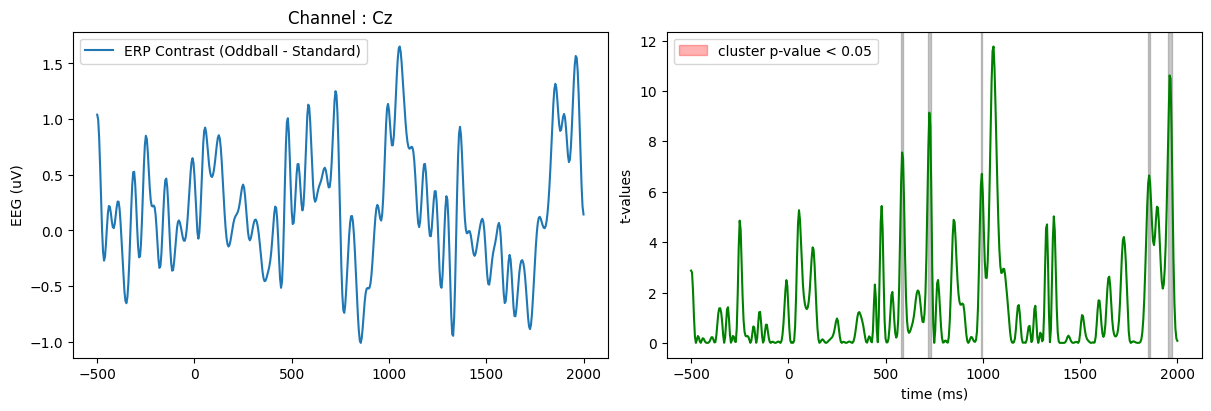

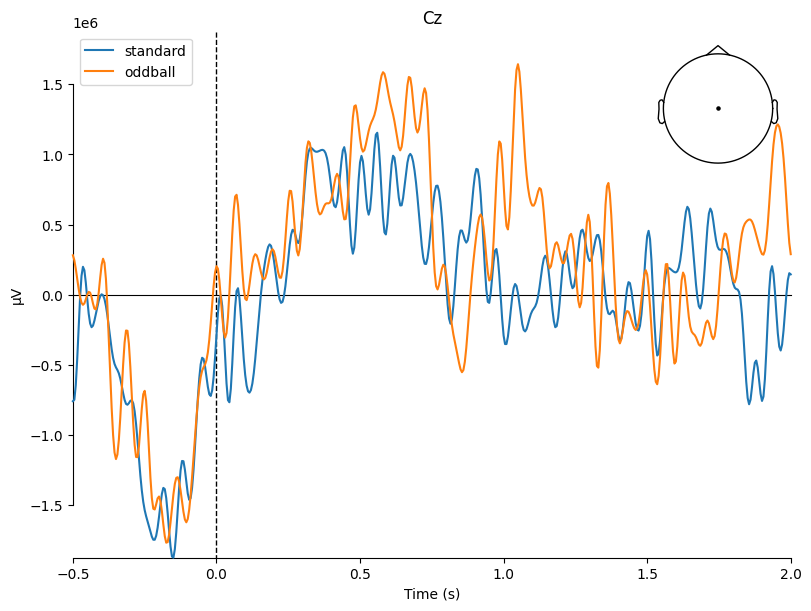

stat_fun(H1): min=0.000000 max=9.462090
Running initial clustering …
Found 4 clusters


C:\Users\malann\AppData\Local\Temp\ipykernel_997856\893834320.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_odd_Cz = epochs_aff_odd.copy().crop(crop_min,crop_max).pick([chl]).get_data()[:, 0, :]  # only 1 channel as 3D matrix
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\893834320.py:4: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_typ_Cz = epochs_aff_typ.copy().crop(crop_min,crop_max).pick([chl]).get_data()[:, 0, :]  # only 1 channel as 3D matrix
C:\Users\malann\AppData\Local\Temp\ipykernel_997856\893834320.py:5: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_go_Cz = epochs_Goballistic.copy().crop(crop_min,crop_max).pick([chl]).get_data()[:, 0, :]  # only 1 channel as 3D matrix


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]

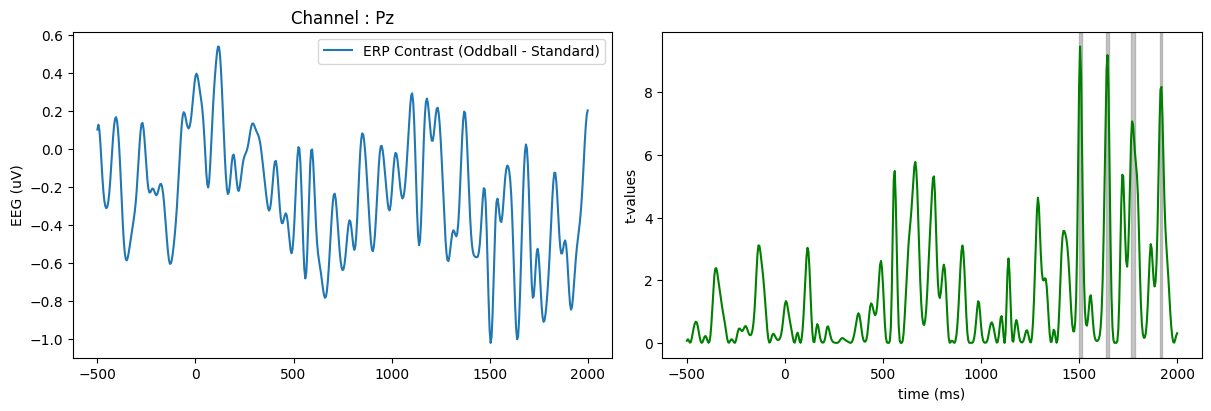

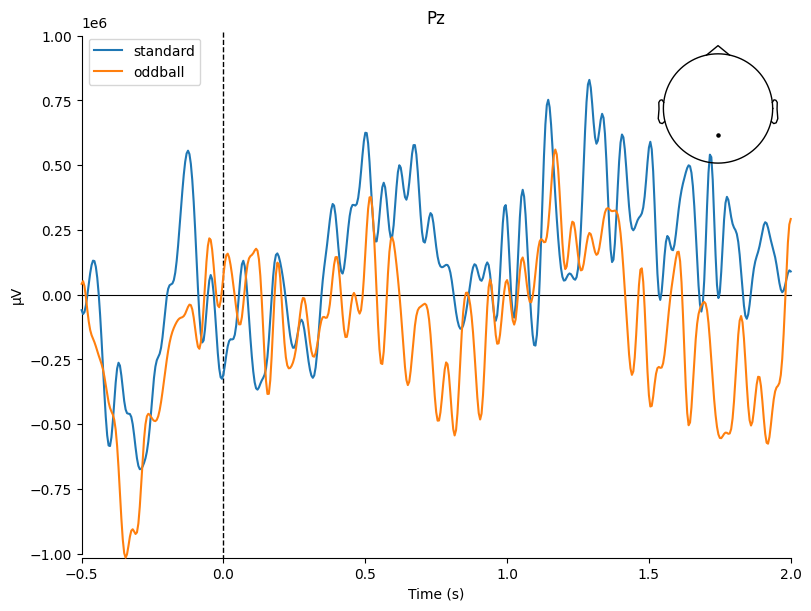

In [108]:
chnls = ['Fz','Cz','Pz']
for chl in chnls:
    epochs_odd_Cz = epochs_aff_odd.copy().crop(crop_min,crop_max).pick([chl]).get_data()[:, 0, :]  # only 1 channel as 3D matrix
    epochs_typ_Cz = epochs_aff_typ.copy().crop(crop_min,crop_max).pick([chl]).get_data()[:, 0, :]  # only 1 channel as 3D matrix
    epochs_go_Cz = epochs_Goballistic.copy().crop(crop_min,crop_max).pick([chl]).get_data()[:, 0, :]  # only 1 channel as 3D matrix
    
    import scipy
    threshold = 6.0
    n_observations = epochs_typ_Cz.shape[0]
    n_conditions =2


    stat_fun = partial(mne.stats.ttest_ind_no_p, sigma=1e-3)
    n_permutations = 5000
    p_threshold = 0.001
    t_threshold = -stats.distributions.t.ppf(p_threshold / 2., 48 - 1)
    #    stat_fun=stat_fun,



    pval = 0.05  # arbitrary
    dfn = n_conditions - 1  # degrees of freedom numerator
    dfd = n_observations - n_conditions  # degrees of freedom denominator
    thresh = scipy.stats.f.ppf(1 - pval, dfn=dfn, dfd=dfd)  # F distribution



    F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
        [epochs_odd_Cz, epochs_typ_Cz],
        out_type="mask",
        n_permutations=n_permutations,
        threshold=threshold,
        tail=0,
        seed=np.random.default_rng(seed=8675309),
    )


    times = 1e3 * epochs_aff_odd.copy().crop(crop_min,crop_max).pick([chl]).times  # change unit to ms

    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 4), layout="constrained")
    channel =chl


    # Compute the difference in evoked to determine which was greater since
    # we used a 1-way ANOVA which tested for a difference in population means
    evoked_odd_Cz = epochs_odd_Cz.mean(axis=0)
    evoked_typ_Cz = epochs_typ_Cz.mean(axis=0)
    evoked_power_contrast = evoked_odd_Cz - evoked_typ_Cz
    signs = np.sign(evoked_power_contrast)

    # Create new stats image with only significant clusters
    F_obs_plot = np.nan * np.ones_like(F_obs)
    for c, p_val in zip(clusters, cluster_p_values):
        if p_val <= 0.05:
            F_obs_plot[c] = F_obs[c] * signs[c]


    ax.set_title("Channel : " + channel)

    ax.plot(
        times,
        epochs_odd_Cz.mean(axis=0) - epochs_typ_Cz.mean(axis=0),
        label="ERP Contrast (Oddball - Standard)",
    )
    ax.set_ylabel("EEG (uV)")
    ax.legend()

    vline1 = []
    
    for i_c, c in enumerate(clusters):
        c = c[0]
        if cluster_p_values[i_c] <= 0.05:
            
            vline1.append(times[c.start]/1000)
            vline1.append(times[c.stop - 1]/1000)
            
            #h = ax2.axvspan(times[c.start], times[c.stop - 1], color="r",fill=True,  alpha=0.3)
            ax2.legend((h,), ("cluster p-value < 0.05",))

        else:
            ax2.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3), fill=True, alpha=0.3)


    hf = plt.plot(times, F_obs, "g")
    ax2.set_xlabel("time (ms)")
    ax2.set_ylabel("t-values")

    
    mne.viz.plot_compare_evokeds(
        dict(standard=evoked_typ.copy().crop(crop_min,crop_max).pick([chl]),oddball=evoked_odd.copy().crop(crop_min,crop_max).pick([chl])),
        legend="upper left",
        show_sensors="upper right",title=channel
    )


In [ ]:
import scipy
threshold = 6.0
n_observations = epochs_typ_Cz.shape[0]
n_conditions =2


stat_fun = partial(mne.stats.ttest_ind_no_p, sigma=1e-3)
n_permutations = 5000
p_threshold = 0.001
t_threshold = -stats.distributions.t.ppf(p_threshold / 2., 48 - 1)
#    stat_fun=stat_fun,



pval = 0.05  # arbitrary
dfn = n_conditions - 1  # degrees of freedom numerator
dfd = n_observations - n_conditions  # degrees of freedom denominator
thresh = scipy.stats.f.ppf(1 - pval, dfn=dfn, dfd=dfd)  # F distribution



F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [epochs_odd_Cz, epochs_typ_Cz],
    out_type="mask",
    n_permutations=1000,
    threshold=6,
    tail=0,
    seed=np.random.default_rng(seed=8675309),
)


times = 1e3 * epochs_aff_odd.copy().crop(crop_min,crop_max).pick(['Cz']).times  # change unit to ms

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 4), layout="constrained")
channel ='Cz'


# Compute the difference in evoked to determine which was greater since
# we used a 1-way ANOVA which tested for a difference in population means
evoked_odd_Cz = epochs_odd_Cz.mean(axis=0)
evoked_typ_Cz = epochs_typ_Cz.mean(axis=0)
evoked_power_contrast = evoked_odd_Cz - evoked_typ_Cz
signs = np.sign(evoked_power_contrast)

# Create new stats image with only significant clusters
F_obs_plot = np.nan * np.ones_like(F_obs)
for c, p_val in zip(clusters, cluster_p_values):
    if p_val <= 0.05:
        F_obs_plot[c] = F_obs[c] * signs[c]

        
ax.set_title("Channel : " + channel)

ax.plot(
    times,
    epochs_odd_Cz.mean(axis=0) - epochs_typ_Cz.mean(axis=0),
    label="ERP Contrast (Oddball - Standard)",
)
ax.set_ylabel("EEG (uV)")
ax.legend()


for i_c, c in enumerate(clusters):
    c = c[0]
    if cluster_p_values[i_c] <= 0.05:
        h = ax2.axvspan(times[c.start], times[c.stop - 1], color="r",fill=True,  alpha=0.3)
        ax2.legend((h,), ("cluster p-value < 0.05",))

    else:
        ax2.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3), fill=True, alpha=0.3)
        
        
hf = plt.plot(times, F_obs, "g")
ax2.set_xlabel("time (ms)")
ax2.set_ylabel("t-values")



In [ ]:
import scipy
threshold = 6.0
n_observations = epochs_typ_Cz.shape[0]
n_conditions =2


stat_fun = partial(mne.stats.ttest_ind_no_p, sigma=1e-3)
n_permutations = 5000
p_threshold = 0.001
t_threshold = -stats.distributions.t.ppf(p_threshold / 2., 48 - 1)
#    stat_fun=stat_fun,



pval = 0.05  # arbitrary
dfn = n_conditions - 1  # degrees of freedom numerator
dfd = n_observations - n_conditions  # degrees of freedom denominator
thresh = scipy.stats.f.ppf(1 - pval, dfn=dfn, dfd=dfd)  # F distribution



F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [epochs_odd_Cz, epochs_go_Cz],
    out_type="mask",
    n_permutations=1000,
    threshold=6,
    tail=0,
    seed=np.random.default_rng(seed=8675309),
)


times = 1e3 * epochs_aff_odd.copy().crop(crop_min,crop_max).pick(['Cz']).times  # change unit to ms

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 4), layout="constrained")
channel ='Cz'


# Compute the difference in evoked to determine which was greater since
# we used a 1-way ANOVA which tested for a difference in population means
evoked_odd_Cz = epochs_odd_Cz.mean(axis=0)
evoked_go_Cz = epochs_go_Cz.mean(axis=0)
evoked_power_contrast = evoked_odd_Cz - evoked_go_Cz
signs = np.sign(evoked_power_contrast)

# Create new stats image with only significant clusters
F_obs_plot = np.nan * np.ones_like(F_obs)
for c, p_val in zip(clusters, cluster_p_values):
    if p_val <= 0.05:
        F_obs_plot[c] = F_obs[c] * signs[c]

        
ax.set_title("Channel : " + channel)

ax.plot(
    times,
    epochs_odd_Cz.mean(axis=0) - epochs_go_Cz.mean(axis=0),
    label="ERP Contrast (Oddball - Standard)",
)
ax.set_ylabel("EEG (uV)")
ax.legend()


for i_c, c in enumerate(clusters):
    c = c[0]
    if cluster_p_values[i_c] <= 0.05:
        h = ax2.axvspan(times[c.start], times[c.stop - 1], color="r",fill=True,  alpha=0.3)
        ax2.legend((h,), ("cluster p-value < 0.05",))

    else:
        ax2.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3), fill=True, alpha=0.3)
        
        
hf = plt.plot(times, F_obs, "g")
ax2.set_xlabel("time (ms)")
ax2.set_ylabel("t-values")

